 # Objective
    Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in visibility in search results. This feature will help bring more attention to newer apps that have potential.

    The task is to understand what makes an app perform well - size? price? category? multiple factors together? Analyze the data and present your insights in a format consumable by business – the final output of the analysis would be presented to business as insights with supporting data/visualizations.

## Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('playstore-analysis (2) (1).csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


Several Missing Values at 'Rating'

In [4]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# TASKS

# 1. Data Clean up-Missing values treatement

### a. Drop record where rating is missing since rating is our target/study variable

In [5]:
print(f"Missing values :\n {data.isnull().sum()}") #Finding the null values

Missing values :
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


It was found that in column "rating" 1474 values are missing.
We drop missing values in rating column

In [6]:
data1 = data.dropna(subset=['Rating'])

In [7]:
print(f"Missing Values :\n{data1.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


### b. Check the null values for the Android Ver column.

In [8]:
print(f"Missing values in Android Ver: \t{data1['Android Ver'].isnull().sum()}")

Missing values in Android Ver: 	3


In [9]:
print(data1[data1.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

#### i. Are all 3 record having the same problem ?

YES

#### ii. Drop the 3rd record i.e. record for"Life made WIFI..."

In [10]:
data2 = data1.drop(10472)
#Verifiction for double checking
corrected = data2[data2['App']=='Life Made WI-FI Touchscreen Photo Frame']
corrected

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


SO here we successfully droped 'Life Made WI-FI Touchscreen Photo Frame' as in output we found an empty datadrame.

In [11]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### iii. Replace remaining missing values with the mode.

In [12]:
import statistics 
Android_list = data2['Android Ver'].to_list()
print(Android_list)

['4.0.3 and up', '4.0.3 and up', '4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up', '4.0.3 and up', '4.2 and up', '3.0 and up', '4.0.3 and up', '4.1 and up', '4.0 and up', '4.1 and up', '4.4 and up', '2.3 and up', '4.2 and up', '4.1 and up', '2.3 and up', '4.0.3 and up', '4.1 and up', '4.1 and up', '4.0.3 and up', '4.0.3 and up', '4.1 and up', '3.0 and up', '4.0.3 and up', '4.0.3 and up', '2.3 and up', '2.3 and up', '4.0.3 and up', '2.3 and up', '4.0 and up', '4.1 and up', '4.1 and up', '4.1 and up', '4.4 and up', '2.3.3 and up', '4.0.3 and up', '4.0 and up', '4.0.3 and up', '4.0.3 and up', 'Varies with device', '4.1 and up', '4.1 and up', '4.1 and up', '4.1 and up', '4.1 and up', '2.3 and up', '4.0.3 and up', '4.1 and up', '4.1 and up', 'Varies with device', '4.1 and up', '4.1 and up', '4.0 and up', '4.4 and up', '4.1 and up', '2.2 and up', '4.4 and up', '4.0.3 and up', '4.2 and up', '4.1 and up', '4.0 and up', '4.2 and up', '4.4 and up', '2.3 and up', 'Varies with device', 'Va

In [13]:
data2_new = data2.fillna(statistics.mode(Android_list))
data2_new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
print(data2_new.loc[[4453]])
print(data2_new.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4  4.1 and up  
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490  4.1 and up  


Now Android Ver is 4.1 and up for category 'Personalization'

#### c. Current ver - replace with most common value

In [15]:
print(f"Missing Values: {data2_new['Current Ver'].isnull().sum()}") #Rechecking

Missing Values: 0


No missing Value is Observed

### 2. Data Clean up - correcting the data types

#### a. Which all vairables need to be brought to numeric type?

In [16]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


Reviews, size, last updated end to be brought to numeric type 

In [17]:
data2_new['Reviews'] = data2_new['Reviews'].astype(int)
data2_new['Size'] = data2_new['Size'].astype(int)
data2_new['Last Updated'] = data2_new['Last Updated'].astype('datetime64[ns]')

In [18]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   object        
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(9)
memory usage: 1.2+ MB


#### b. Pricevariable - remove $ sign and convert to float 

In [19]:
data2_new['Price'] = data2_new['Price'].str.replace("$",'')

In [20]:
data2_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [21]:
data2_new['Price'] = data2_new['Price'].astype(float)

In [22]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


Here we converted various column attributes in as following data type:

column_2 Rating 9366 non-null float64
column_3 Reviews 9366 non-null int32
column_4 size 9366 non-null int32
column_7 Price 9366 non-null float64
column_10 Last Updated 9366 non-null datetime64[ns]

#### c. Installs - remove,'' and '+' sign, convert to integer

In [24]:
data2_new['Installs'] = data2_new['Installs'].str.replace('+','').str.replace(',','')

In [25]:
data2_new['Installs'] = data2_new['Installs'].astype(int)

In [31]:
data2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [32]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


Successfully removed '+' and ',' sign from column Installs and changed datatype to int as per requirement

## 3. Sanity checks - check for the following and handle accordingly

#### a. Avg. reating should be betwween 1 and 5, as only these values are allowed on the play store.

In [36]:
pd.unique(data2_new[['Rating']].values.ravel()) #Ravel() --> return 1D array with all the input - array elements

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Her, Yes all avg. rating values is in between 1 and 5 

#### i. Are there any such record? Drop if so

No such record has been observed.

#### b. Reviews should not be more than install as only those who installed can review the app.

In [38]:
df = pd.DataFrame()
df = data2_new[data2_new.Reviews<= data2_new.Installs]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [41]:
df.shape

(9359, 13)

## 4. Identify and handle outliers 

#### a. Price Column

#### i. Make suitable plot identify outliers in price

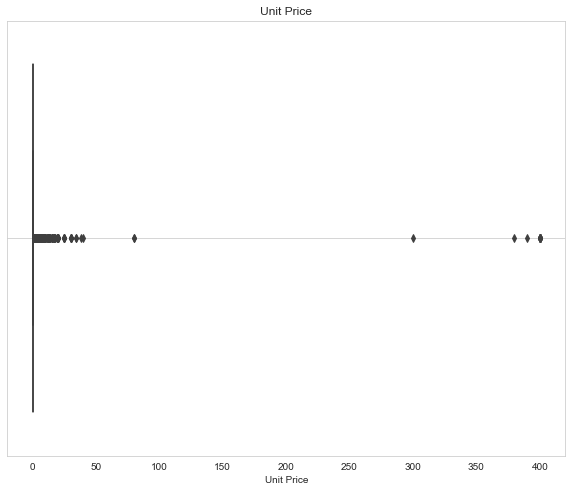

In [54]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle = '-')
plt.show()

As using above boxplot we can observe the outliers in price column.

#### ii. Do you expect apps on the play store to cost $200 ?
Check out these cases

In [61]:
result_df = data2_new[data2_new['Price'] == 200]
list(result_df)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In original datafram there is a row off app $200 but it had rating column as blank so when priviously we drop data whose Rating values is null, this data frame gets removed. Hance in new data frame we got empty dataframe

#### iii. After dropping the useless recored, make the suitable plot again to identify outliers --> To fullfill above contain lets remove whose price values is 0 

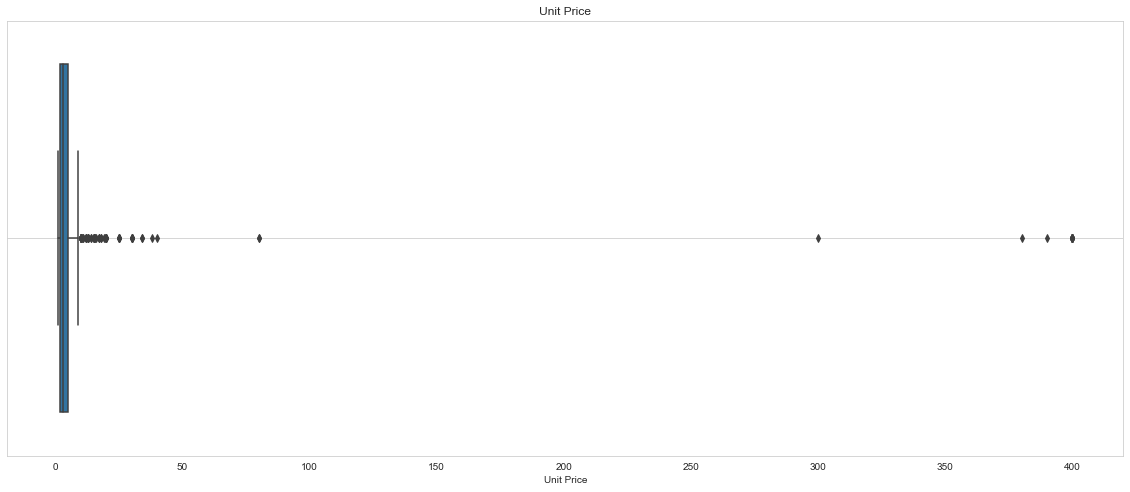

In [62]:
useful_df = df[df['Price'] != 0]
plt.subplots(figsize=(20,8))
sns.boxplot(useful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [63]:
#### iv.Limit Data to record with price<$30
limit_data=df[df['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [64]:
limit_data.shape

(9338, 13)

#### b.Reviews column

#### i.Make Suitable plot

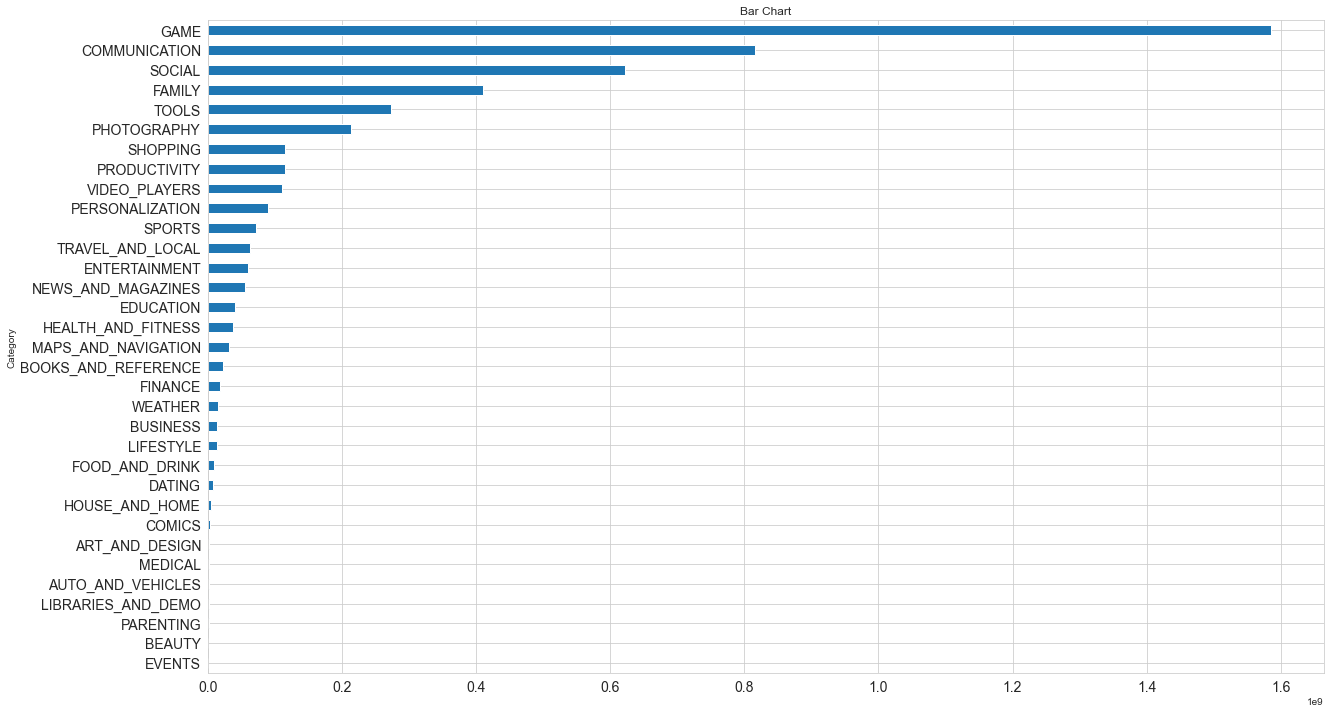

Top 5 Reviewed Apps by Category Category
GAME             1585419555
COMMUNICATION     815461799
SOCIAL            621241071
FAMILY            410223081
TOOLS             273184168
Name: Reviews, dtype: int32


In [71]:
#group by needful columns
total= df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(20,12))
total.plot(kind='barh',fontsize=14)
plt.title("Bar Chart")
plt.show()
print("Top 5 Reviewed Apps by Category",total.sort_values(ascending=False).head())

#### ii. Limit data to app with < 1 Million reviews


In [73]:
limit_data_by_review = df[df['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [74]:
limit_data_by_review.shape

(8655, 13)

8655 rows of limited data to app with Less than 1 million reviews

### c.Installs

#### i. What is the 95th percentile of the installs?

In [76]:
data2_new['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [77]:
val = data2_new.Installs.quantile(0.95) #95th percentile
val

100000000.0

95th Percentile of the installs is 100000000.0

#### ii. Drop record having a values more than the 95th percentile

In [78]:
# Double checking 
x = data2_new.quantile()>val
x

Rating      False
Reviews     False
Size        False
Installs    False
Price       False
Name: 0.5, dtype: bool

There is no values more than the 95th percentile.

## Data analysis to answer buisiness questions

#### 5. What is the distribution of rating like? (use Seaborn) More skewed towards higher/lower values ?

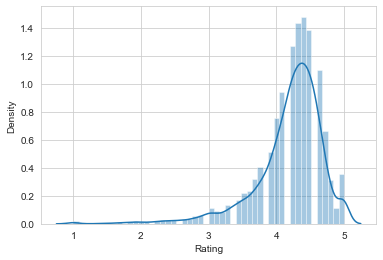

In [79]:
sns.distplot(df['Rating'])
plt.show()

#### a. How do you explain this?

A left skewed distribution is sometimes called a negatively skewd distribution be cause it's long tail is on the negative direction on number line. The mean is also on the left of the peak.
Here you can see three measure position on the plot. so you will find that: 
mean less than the mode  
median less than the mode
mean less then median 

Here the distribution tells that most of the rating is in between 4 to 5.

#### b. What is the implication of this on your analysis?

when we consider our real life the distribution are skewed. If there are too much skewness in thedata, then many statistical model dont work.
So in skewed data, the tail region may act as an outlier for he statical affect the model's performance especially regression-based models.
so there is a necessity to transform the skewed data to close enough to a guassian distributuin or normal distribution. this will allow us to try more number of statistical model.

Conclusion:
    If we have a skewed data then it may harm our results. so in order to use a skewed data we have to apply a log transformation over the whole set of values to discover the pattern in the data and make it usable for the statistical model

#### 6. What are the top content Rating Values?

In [88]:

print("Top Content Rating values are :-\n",df['Content Rating'].value_counts().head())

Top Content Rating values are :-
 Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64


#### a. Are there any values with very few record? 

Yes! 2 of the values have. 
'Unrated' content rating has values 1 and 'Adults only 18+' has values 3.

#### b. If yes, Drop those as they wont help in the analysis

In [119]:
Adult_rating = df[df['Content Rating'] == 'Adult only 18+'].index.to_list()
unrated = df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating,inplace = True)
df.drop(unrated,inplace = True)
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64

In [136]:
#Pie Digram
import plotly.graph_objects as go

labels = ['Everyone','Teen','Mature 17+','Everyone 10+']
values = [7414,1083,461,397]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,title = "Top Content Rating",hole=.3,pull=[0, 0.2,0,  0])])

fig.show()

### 7. Effect of size on rating

#### a. Make a joinplot to imderstand the effect of size on rating

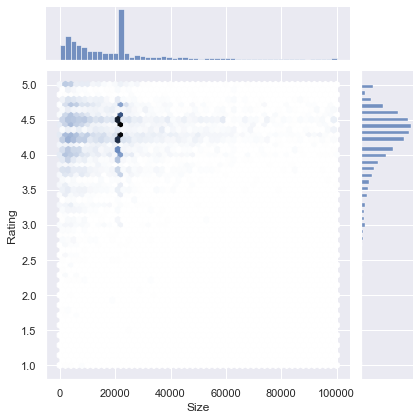

In [140]:
sns.jointplot(x=df['Size'],y=df['Rating'],kind='hex',data=df)
plt.show()

#### b. Do you see any patterns ?
#### c. How do you explain the pattern ?

We observed that the maximum data point gather in between Rating 4.0 - 4.5 abd size 0-40000(40 mb). Which means that the application size which is in between 0-40000(40 mb) get good rating on play store

## 8. Effect of price on rating

#### a. Make a Jointplot(with regression line)

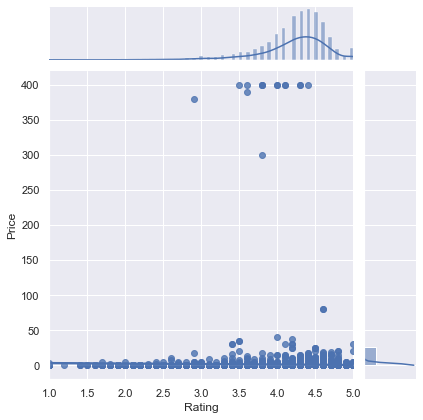

In [141]:
sns.jointplot(x='Rating',y='Price',data=df,kind='reg')
plt.show()

### b. What pattern do you see?

Increasing the price makes Rating Increses

### c. How do you explain the pattern ?

As we can see, the higher the price higher the rating

### d. Replot the data, this time with only record with price > 0 

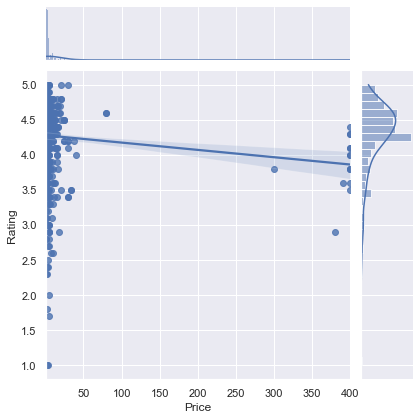

In [142]:
Price_greaterthan_zero = df[df['Price']>0]
sns.jointplot(x='Price',y='Rating',data = Price_greaterthan_zero,kind = 'reg')
plt.show()

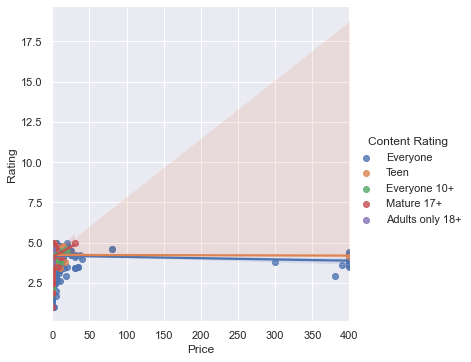

In [143]:
sns.lmplot(x='Price',y='Rating',hue='Content Rating',data=df)
plt.show()

e. Does the pattern change?
f. What is your overall inference on the effect of price on the rating

Content Ratin 'Mature' and 'Teen' are more positively co-related in content rating than n 10+ and everyone

### 9. Look at all the numeric interactions together - 

a. Make a pairplot with the columns - 'Reviews','Size','Rating', 'Price'

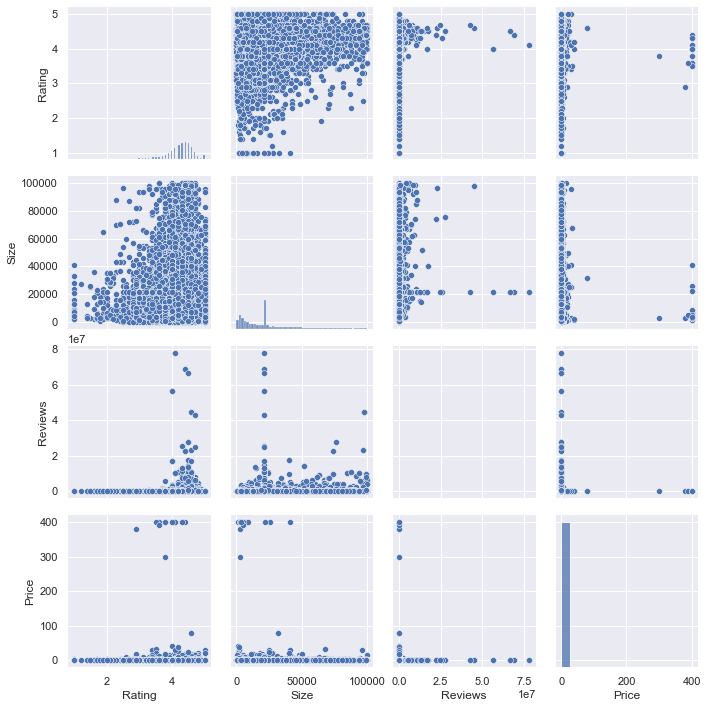

In [144]:
sns.pairplot(df,vars=['Rating','Size','Reviews','Price'])
plt.show()

This is the basic exploratory analysis to look for any evident patterns or relationship between the features

### 10. Rating vs. Content Rating

a. Make a bar plot displaying the rating for each content rating

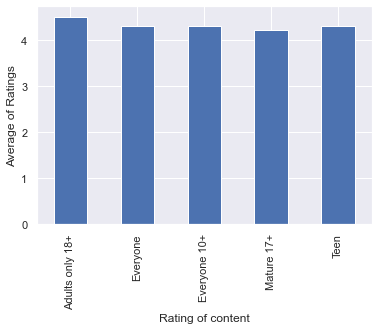

In [145]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind='bar')
a.set(xlabel = 'Rating of content',ylabel = 'Average of Ratings')
plt.show()

b. Which materic would you use? Mean ? Median? Some other quantile ?

c. Choose the right metric and plot

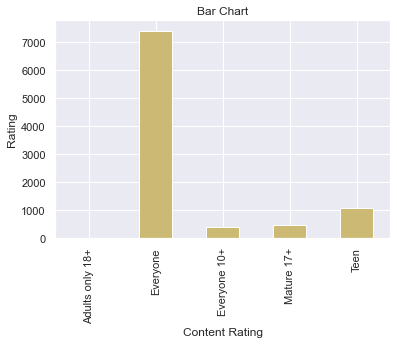

In [151]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color = 'y')
plt.ylabel('Rating')
plt.title('Bar Chart')
plt.show()

## 11. Content rating vs. Size vs. Rating -3 variable at a time

a. create 5 buckets (20% record in each) based on size

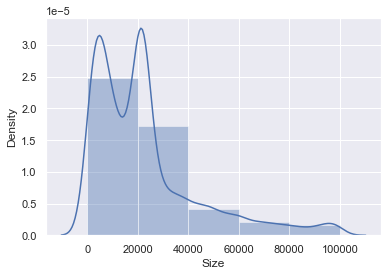

In [152]:
#Checking Skewness
sns.distplot(df['Size'],bins=5)
plt.show()

In [158]:
bin = [0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bin, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,,
VERY LOW,NaN,4.116056,4.188889,3.951429,4.224490
LOW,4.6,4.161317,4.207143,4.129592,4.209655
MED,3.8,4.242463,4.262602,4.091975,4.205630
HIGH,NaN,4.179122,4.209375,4.168333,4.213158
VERY HIGH,4.5,4.208134,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets,get the rating (20th percentile) for each combination 

In [160]:
df.Size.quantile([0.2,0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [162]:
df.Rating.quantile([0.2,0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

c. Make a heatmap of this 

i. Annotated

In [166]:
Size_Buckets = pd.pivot_table(df,values='Rating',index='Size_Buckets',columns='Content Rating',aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,,
VERY LOW,NaN,3.8,3.84,3.28,3.90
LOW,4.6,3.8,3.94,3.64,3.88
MED,3.8,4.0,4.10,3.90,3.90
HIGH,NaN,3.9,4.00,3.90,4.00
VERY HIGH,4.5,3.9,4.10,4.00,4.00


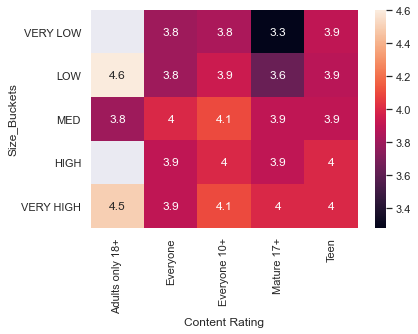

In [167]:
sns.heatmap(Size_Buckets,annot=True)
plt.show()

ii. Green color map

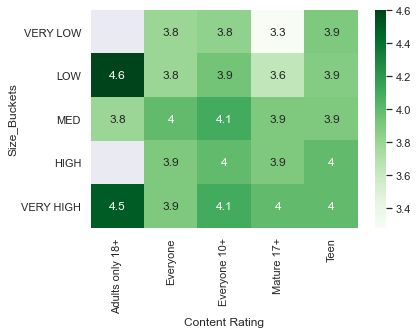

In [168]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

My inference is that most of the havier apps seems to be more preferred in the "Content Ratings". But, at the same time there is no big variations in it. The only exceptional case is Mature 17+ where low size apps arent preferred to a greater variation.